# Author: Apurv verma
## GRIP - The Spark Foundation
## Task 1:prediction using supervised machine learning
## Problem: Predict the percentage of an student based on the no. of study hours.

##  Step1: Importing the libraries

In [35]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

## Step 2:understanding the datasets

In [64]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
data.shape

(25, 2)

In [38]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [40]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


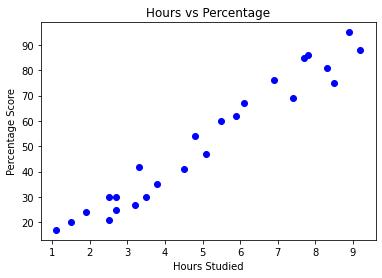

In [41]:
plt.scatter(x=data['Hours'], y=data['Scores'], marker='o',color='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Step3: Preperation of data

In [42]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Step 4:Train the algorithm

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


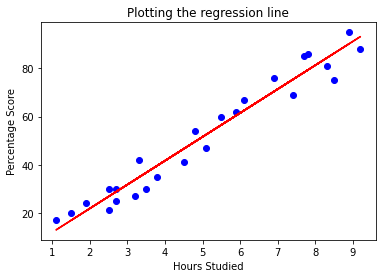

In [51]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Plotting the regression line') 
plt.scatter(X, y,color='blue')
plt.plot(X, line,color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [52]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105355

## Step5:Evaluting the model to check its performance

In [63]:
from sklearn import metrics  
print('Mean Square Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Square Error: 21.598769307217413


In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298


## Step6:Predict score 

In [66]:
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Thank You